In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = '../datasets/image_hough.png'  # Çemberler içeren bir görüntü yolu
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Kenar tespiti için Canny kullanarak ön işleme
edges = cv2.Canny(gray_image, 50, 150)



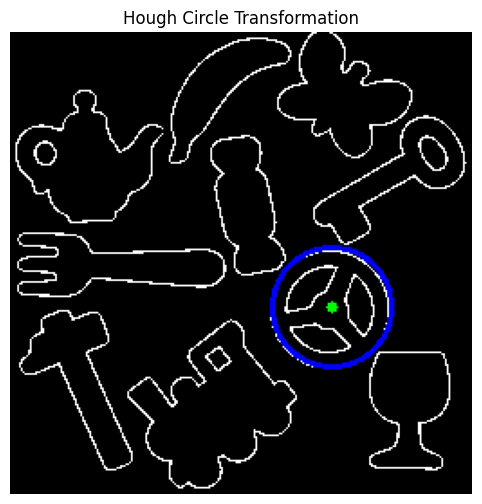

In [18]:
# Hough Circle Transformation için parametre ayarlamaları
circles = cv2.HoughCircles(
    edges,  # Canny kenarları kullan
    cv2.HOUGH_GRADIENT,
    dp=1,        # Görüntü çözünürlüğü ölçeklendirme
    minDist=30,  # Merkezler arası minimum mesafe
    param1=100,  # Kenar tespiti için üst eşik
    param2=35,   # Biriktirme eşiği
    minRadius=5, # Minimum yarıçap
    maxRadius=60 # Maksimum yarıçap
)

# Çemberleri görüntüye çiz
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Çemberin merkezine bir nokta çiz
        cv2.circle(image, (x, y), 3, (0, 255, 0), -1)
        # Çemberin çevresini çiz
        cv2.circle(image, (x, y), r, (255, 0, 0), 2)

# Görüntüyü göster
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Hough Circle Transformation")
plt.axis("off")
plt.show()

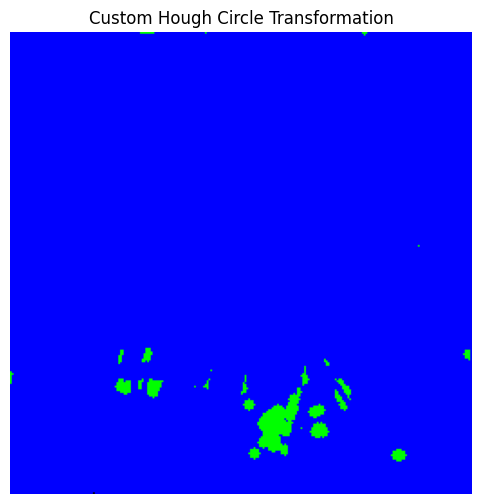

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_circle_transform(edges, min_radius, max_radius, threshold):
    height, width = edges.shape
    radii_range = max_radius - min_radius
    accumulator = np.zeros((height, width, radii_range), dtype=np.uint64)
    
    # Kenar piksellerini bul
    edge_pixels = np.argwhere(edges > 0)
    
    # Önceden hesaplanmış sin ve cos değerleri
    theta = np.deg2rad(np.arange(0, 360))
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    # Her bir kenar pikseli için olası çemberleri biriktir
    for y, x in edge_pixels:
        for r in range(min_radius, max_radius):
            a = (x - r * cos_theta).astype(int)
            b = (y - r * sin_theta).astype(int)
            valid_idx = (a >= 0) & (a < width) & (b >= 0) & (b < height)
            a = a[valid_idx]
            b = b[valid_idx]
            accumulator[b, a, r - min_radius] += 1
    
    # Biriktirme matrisinde eşik değerini aşan çemberleri bul
    circles = []
    for r_idx in range(radii_range):
        r = r_idx + min_radius
        circle_candidates = np.argwhere(accumulator[:, :, r_idx] > threshold)
        for b, a in circle_candidates:
            circles.append((a, b, r))
    
    return circles

# Görüntüyü yükle
image_path = '../datasets/image_hough.png'  # Çemberler içeren bir görüntü yolu
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Kenar tespiti için Canny kullanarak ön işleme
edges = cv2.Canny(gray_image, 50, 150)

# Kendi Hough Circle Transformasyonumuzu uygula
min_radius = 5
max_radius = 60
threshold = 35
circles = hough_circle_transform(edges, min_radius, max_radius, threshold)

# Çemberleri görüntüye çiz
if circles is not None:
    for (x, y, r) in circles:
        # Çemberin merkezine bir nokta çiz
        cv2.circle(image, (x, y), 3, (0, 255, 0), -1)
        # Çemberin çevresini çiz
        cv2.circle(image, (x, y), r, (255, 0, 0), 2)

# Görüntüyü göster
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Custom Hough Circle Transformation")
plt.axis("off")
plt.show()